<a href="https://colab.research.google.com/github/JolaSobera/FUZZY/blob/main/rozmyte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zbiór rozmyty

W tej wersji poprawiono max_wysokość, jest skojarzona ze zbiorem a nie z pprzestrzenią

Ustalmy pewną przestrzeń $X$ oraz pewien zbiór $A \subset X$. O elementach przestrzeni $X$ można powiedzieć, że należą
do zbioru $A$ lub nie należą do tego zbioru, zatem każdemu elementowi przestrzeni $X$ można przypisać
wartość 1 gdy należy on do zbioru $A$ i $0$ gdy nie należy do tego zbioru.

Opisana funkcja nazywa się
funkcją charakterystyczną zbioru A. Zbiór rozmyty to rozszerzenie pojęcia funkcji charakterystycznej
zbioru na przedział $[0, 1]$, to znaczy elementom przyporządkowujemy stopnie przynależno±ści do zbioru
$A$ z przedziału $[0, 1]$. Wartość $0$ oznacza, że element $x \in X$ nie należy do $A$, a $1$ oznacza pełną
przynależność do tego zbioru.

 Wprowadzmy formalną defnicję zbioru rozmytego.

 Defnicja 1 Niech X będzie przestrzenią. Funkcję $A \colon X \to [0, 1]$ nazywamy zbiorem rozmytym. Rodzinę wszystkich zbiorów rozmytych określonych na $X$ będziemy oznaczać przez $F(X)$. Funkcję $A$ nazywamy funkcją przynależności.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dzialania_rozmyte

class ZbiorRozmyty:
    '''
    Klasa tworzy przestrzeń i zawiera słownik zbiorów rozmytych.

    Argumenty:
      xp - początek przedziału przestrzeni X
      xk - koniec przedziału przestrzeni X
      step - krok - jak gęsto będzie podzielona przestrzeń X
      nazwa - nazwa rodziny zbiorów rozmytych

    Atrybuty:
      przestrzen - lista - przestrzeń X przedstawiona w sposób dyskretny [xp, xp+step, ... xk]
      zbiory - słownik zawierający zbiory rozmyte określone na przestrzeni X
      nazwa - nazwa rodziny zbiorów rozmytych
    '''
    def __init__(self, xp, xk, step, nazwa):
        self.przestrzen = np.arange(xp, xk+step, step)
        self.zbiory = {}
        self.nazwa = nazwa

    def nowy_zbior_rozmyty(self, a0, a1, b1, b0, nazwa, max_wysokosc = 1):
        '''
        Funkcja dodaje nowy zbiór rozmyty do przestrzeni.
        '''
        zbior = (a0, a1, b1, b0)
        self.zbiory[nazwa] = (zbior, max_wysokosc)

    def nowy_zbior_rozmyty_punkty(self, nazwa, tablica_wartosci):
        '''
        Funkcja dodaje nowy zbiór rozmyty do przestrzeni.
        '''
        self.zbiory[nazwa] = (tablica_wartosci, max(tablica_wartosci))

    def zbior_rozmyty_wartosc(self, a0, a1, b1, b0, x, max_wysokosc = 1 ):
        '''
        Funkcja oblicza wartosc funkcji przynależności zbioru rozmytego dla zadanego punktu x.
        '''

        linia_a = ZbiorRozmyty.funkcja_liniowa([a0, 0], [a1, max_wysokosc])##współczynniki a, b
        linia_b = ZbiorRozmyty.funkcja_liniowa([b1, max_wysokosc], [b0, 0])
        if (x >= self.przestrzen[0] and x <= a0) or (x >= b0 and x <= self.przestrzen[-1]):
            return 0
        elif x >= a0 and x <= a1:
          if a0 != a1:
            return linia_a[0]*x + linia_a[1]
          else:
            return linia_a
        elif x >= b1 and x <= b0:
          if b0 != b1:
            return linia_b[0]*x + linia_b[1]
          else:
            return linia_b
        elif x >= a1 and x <= b1:
          return max_wysokosc

    def funkcja_liniowa(c, d):
        '''
        Funkcja służy do wyznaczana równania prostej przechodzącej przez dwa punkty c i d.

        Argumenty:
          c, d - krotki lub listy zawierające współrzędne punktów, przez które przechodzi prosta.

        Wynik:
          Funkcja zwraca krotkę zawierającą wartości współczynników funkcji liniowej ax + b przechodzącej przez
          punkty c i d gdy d[0] jest różne od c[0] lub wartość d[0] jeżeli prosta ma równanie x=d[0]
          tzn. jest prostopadła do osi OX.
        '''

        if d[0] - c[0] != 0:
          a = (d[1] - c[1]) / (d[0] - c[0])
          b = -a*c[0] + c[1]
          return (a, b)
        else:
          return d[0]

    def zbior_rozmyty_wykres(self, nazwa,  kolor = 'blue'):
        '''
        Funkcja rysuje wykres zbioru rozmytego i zapisuje go w pliku. Funkcja rysuje odcinki, słuzy tylko do zbiorów w kształce trapezów lub trójkątów.

        Arg:
          nazwa: nazwa zbioru rozmytego, to będzie nazzwa pliku z wynikiem
          max_w: wyskość zbioru rozmytego (największa wartość funkcji)
          kolor: kolor wykresu.
        '''
        a0, a1, b1, b0 =  self.zbiory[nazwa][0]
        max_wysokosc = self.zbiory[nazwa][1]
        plt.plot([self.przestrzen[0], a0], [0, 0],  color=kolor)
        if self.przestrzen[0] != a1:
          plt.plot([a0, a1], [0, max_wysokosc], color=kolor)
        plt.plot([a1, b1], [max_wysokosc, max_wysokosc], label=nazwa, color=kolor)
        if self.przestrzen[-1] != b1:
          plt.plot([b1, b0], [max_wysokosc, 0], color=kolor)
        plt.plot([b0, self.przestrzen[-1]], [0, 0],  color=kolor)
        plt.legend()
        #plt.savefig(nazwa)

    def __str__(self):
      wynik = f"Rodzina zbiorów rozmytych {self.nazwa},"
      for k,v in self.zbiory.items():
        wynik += f"\n  {k,v}"
      return wynik

    def get_zbiory(self):
      return self.zbiory

    def get_zbior(self, nazwa):
      return self.zbiory[nazwa]
  ### Częśc 2- punkt - po punkcie

    def wyznacz_liste_wartosci_zbioru(self, nazwa):
        """
        Funkcja tworzy listę wartości dla zbioru rozmytgo.
        """
        a0, a1, b1, b0 = self.zbiory[nazwa][0]
        max_wysokosc = self.zbiory[nazwa][1]
        #print(self.zbiory[nazwa][0])
        if a0 == self.przestrzen[0] and a1 == self.przestrzen[0]:
            a0 = self.przestrzen[0] - 1
        if b0 == self.przestrzen[-1] and b1 == self.przestrzen[-1]:
            b0 = self.przestrzen[-1] + 1

        zbior = [self.zbior_rozmyty_wartosc(a0, a1, b1, b0, i, max_wysokosc ) for i in self.przestrzen]
        return zbior

    def zbior_rozmyty_wykres_punkty(self, nazwa, plik =True, kolor = 'blue'):
        '''
        Funkcja rysuje wykres danego zbioru rozmytego punkt po punkcie i zapisuje go w pliku o nazwie podanej jako pierwszy argument..

        Arg:
          nazwa: nazwa zbioru rozmytego
          plik: jeżeli ustawiony na True rysunek zostanie zapisany w pliku
        '''
        if nazwa[0:2] != "P_": ## P_ oznacza punktowy -są to zbiory, które powstały w wyniku działań i były wyznaczane punkt po punkcie
                               ### zatem jeżeli zbiór nie jest pamiętany jako lista punktów tylko jako krotka (a0,a1,b1, b0) to wyznaczamy listę wartości
          zbior = self.wyznacz_liste_wartosci_zbioru(nazwa)
          #print("Kontrola wartosci")
          #print(zbior)

        else:
          zbior = self.zbiory[nazwa][0]
         # print(zbior)
        plt.plot(self.przestrzen, zbior, label = nazwa, color = kolor)
        #plt.legend()
       # if plik:
         # plt.savefig(nazwa)
        return

    def rysuj_wszystkie(self):
      kolor = ['blue', 'red', 'green', 'yellow', "black", "orange", "purple", "pink", "brown"]
      i = 0
      print(self.zbiory)
      print(self.zbiory.keys())
      for nazwa in self.zbiory.keys():
         if nazwa[0:2] != "P_": ### uwaga w funkcji zbior_roamyty_wykres_punkty
          self.zbior_rozmyty_wykres(nazwa, kolor[i%7])
         else:
          self.zbior_rozmyty_wykres_punkty(nazwa,False, kolor[i%7])
         i += 1
      plt.savefig(nazwa)

  ### Część 3 -Działania

    def dzialanie_zbiorow_rozmytych(self, nazwa1, nazwa2, norma = dzialania_rozmyte.T_minimum,  wykres=False):
        '''
        Funkcja wykonuje dane dzialanie na dwóch zbiorach rozmytych z jednej przestrzeni.
        '''
        if nazwa1[0:2] != "P_": ##################################################3
          zbior1 = self.wyznacz_liste_wartosci_zbioru(nazwa1)
        else:
          zbior1 = self.zbiory[nazwa1][0]
      ### Wyznaczamy wartości drugiego zbioru
        if nazwa2[0:2] != "P_": ##################################################3
          zbior2 = self.wyznacz_liste_wartosci_zbioru(nazwa2)
        else:
          zbior2 = self.zbiory[nazwa2][0]


        dzialanie = [norma(zbior1[i], zbior2[i]) for i in range(len(self.przestrzen))]

        nazwa_dzialania = str(norma).split(" ")[1]
        nazwa_ret = f'P_{nazwa_dzialania}({nazwa1}, {nazwa2})' ##Wyznaczenie nazwy nowego zbioru rozpoczyna się ona od P_, bo zwiera listę warosci
        max_wysokosc = max(dzialanie)

        self.zbiory[nazwa_ret] = (dzialanie, max_wysokosc)

        if wykres == True:
            self.zbior_rozmyty_wykres_punkty(nazwa_ret)
        return nazwa_ret

   ###  Czesć 5  Niezbędne dla sterownika
    def dzialanie_zbiorow_rozmytych_dla_sprawdz_pomiar(self, nazwa1, nazwa2, norma = dzialania_rozmyte.T_minimum):
        '''
        Funkcja wykonuje dane dzialanie na dwóch zbiorach rozmytych z jednej przestrzeni.
        '''
        if nazwa1[0:2] != "P_": ##################################################3
          zbior1 = self.wyznacz_liste_wartosci_zbioru(nazwa1)
        else:
          zbior1 = self.zbiory[nazwa1][0]
      ### Wyznaczamy wartości drugiego zbioru
        if nazwa2[0:2] != "P_": ##################################################3
          zbior2 = self.wyznacz_liste_wartosci_zbioru(nazwa2)
        else:
          zbior2 = self.zbiory[nazwa2][0]


        dzialanie = [norma(zbior1[i], zbior2[i]) for i in range(len(self.przestrzen))]
        ### wynik jeżeli 0 to znaczy, że zbiory nie miały części wspólnej
        return max(dzialanie)

    def sprawdz_pomiar_ze_zbiorami(self, pomiar, zbiory, t_norma = dzialania_rozmyte.T_minimum):
        '''
        Funkcja zwraca zbiory, ktore mają cześc wspólną z pomiarem, wraz z wartoscia odpalenia
        '''
        odpalone_zbiory = {}

        #print(pomiar, zbiory)
        for i in zbiory:
            #print(f"Kolejny zbiór {i}")
            cz_wspolna = self.dzialanie_zbiorow_rozmytych_dla_sprawdz_pomiar(pomiar, i, t_norma)
            #print(f"cz_wspolna = {cz_wspolna}")
            if cz_wspolna != 0:
                odpalone_zbiory[i] = round(cz_wspolna,2)
        return odpalone_zbiory

    def implikacja(self, nazwa, stopien_odpalenia, implikacja):
      '''Funkcja wykonuje działanie implikacji (importowane z pliku działania) na punktowym zbiorze rozmytym i
          stopniu odpalenia.

      Arg:
        nazwa (napis): nazwa zbioru rozmytego
        stopien_odpalenia (float): stopien odpalenia
        implikacja (str): nazwa implikacji
      Out:
        krotka złożona z nazwy zbioru wejściowego z dopiskiem implikacja i krotki wartości.

      '''
      if nazwa[0:2] != "P_": ##################################################3
          zbior1 = self.wyznacz_liste_wartosci_zbioru(nazwa)
      else:
          zbior1 = self.zbiory[nazwa][0]
      nowa_nazwa = "P_"+nazwa+"_"+"Implikacja"
      dzialanie = [implikacja(zbior1[i], stopien_odpalenia) for i in range(len(self.przestrzen))]

      return (nowa_nazwa, dzialanie)


    def wyostrzenie(self, nazwa):
        '''
        Funkcja zwraca wyostrzona wartosc zwracana przez sterownik za pomoca sredniej wazonej.
        '''
        suma = 0
        waga = 0
        lista_wartosci = self.zbiory[nazwa][0]
        for i in range(len(lista_wartosci)):
            wartosc = lista_wartosci[i]
            #print(i, wartosc, self.przestrzen[i], suma, waga)
            suma += wartosc * self.przestrzen[i]
            waga += wartosc
        srednia_wazona = suma/waga
        return srednia_wazona


## Część A

Rozważmy przestrzeń $X = [-50, 50]$, która  oznacza zakres temperatur. Narysujmy zbiory rozmyte (czyli funkcje) określające pojęcie temperatura jest wysoka i temperatura jest niska.

Nazwa rodziny zbiorów rozmytych - temperatura.

In [ ]:
fs = ZbiorRozmyty(-50, 50, 1, "Temperatura")

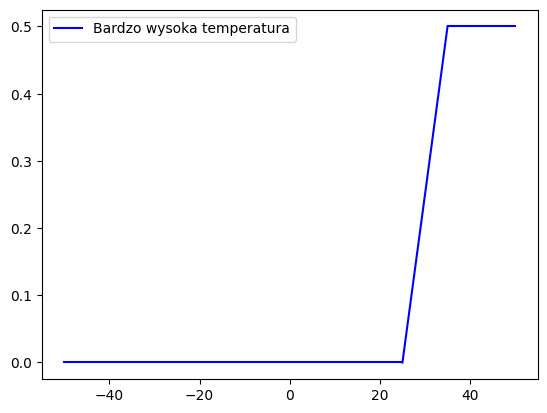

In [ ]:
fs.nowy_zbior_rozmyty(25, 35, 50, 50, "Bardzo wysoka temperatura", 0.5)
fs.zbior_rozmyty_wykres("Bardzo wysoka temperatura")

### 1 - Podstawowe przykłady

Test

Narysuj kilka zbiorów rozmytych obrazujących temperaturę

- ciepło
- zimno,
- gorąco
- bardzo ciepło

Testuj różne wysokości i kształty trójkątne, trapezy

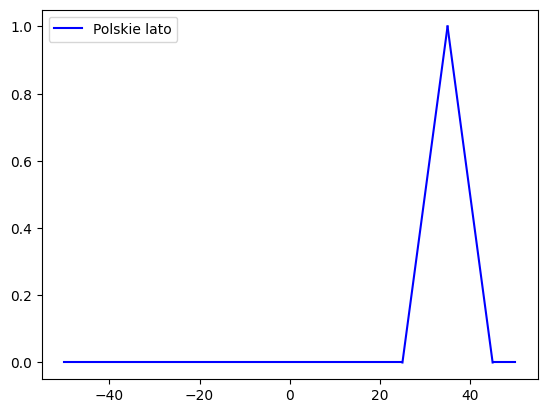

In [ ]:
fs.nowy_zbior_rozmyty(25, 35, 35, 45, "Polskie lato", 1)
fs.zbior_rozmyty_wykres("Polskie lato")

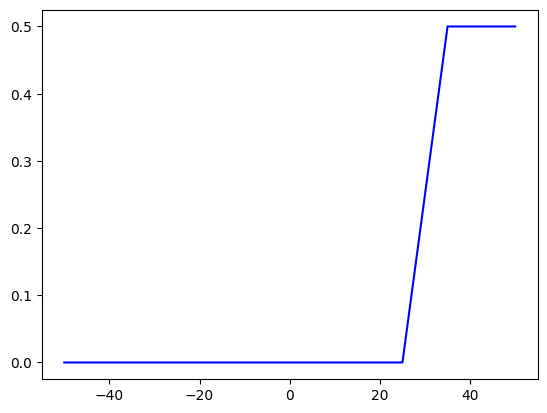

In [ ]:
fs.zbior_rozmyty_wykres_punkty("Bardzo wysoka temperatura")

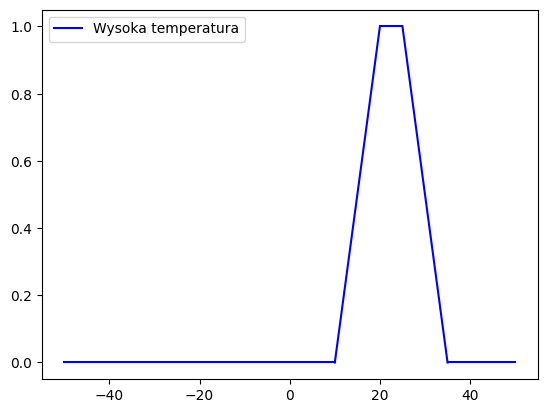

In [ ]:
fs.nowy_zbior_rozmyty(10, 20, 25, 35, "Wysoka temperatura")
fs.zbior_rozmyty_wykres("Wysoka temperatura")

In [ ]:
print(fs)

Rodzina zbiorów rozmytych Temperatura,
  ('Bardzo wysoka temperatura', ((25, 35, 50, 50), 0.5))
  ('Polskie lato', ((25, 35, 35, 45), 1))
  ('Wysoka temperatura', ((10, 20, 25, 35), 1))


### 2 -  testujemy wykresy punktowe

In [ ]:
print(fs)

Rodzina zbiorów rozmytych Temperatura,
  ('Bardzo wysoka temperatura', ((25, 35, 50, 50), 0.5))
  ('Polskie lato', ((25, 35, 35, 45), 1))
  ('Wysoka temperatura', ((10, 20, 25, 35), 1))


In [ ]:
print(fs.wyznacz_liste_wartosci_zbioru("Bardzo wysoka temperatura"))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.050000000000000044, 0.10000000000000009, 0.15000000000000013, 0.20000000000000018, 0.25, 0.30000000000000004, 0.3500000000000001, 0.40000000000000013, 0.4500000000000002, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


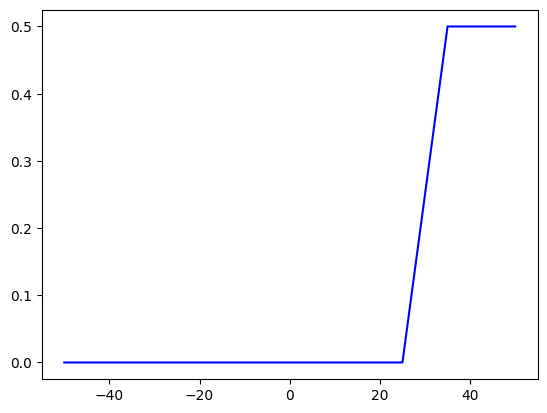

In [ ]:
fs.zbior_rozmyty_wykres_punkty("Bardzo wysoka temperatura")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000027, 0.40000000000000036, 0.5, 0.6000000000000001, 0.7000000000000002, 0.8000000000000003, 0.9000000000000004, 1.0, 0.8999999999999999, 0.7999999999999998, 0.6999999999999997, 0.5999999999999996, 0.5, 0.39999999999999947, 0.2999999999999998, 0.20000000000000018, 0.09999999999999964, 0, 0, 0, 0, 0, 0]


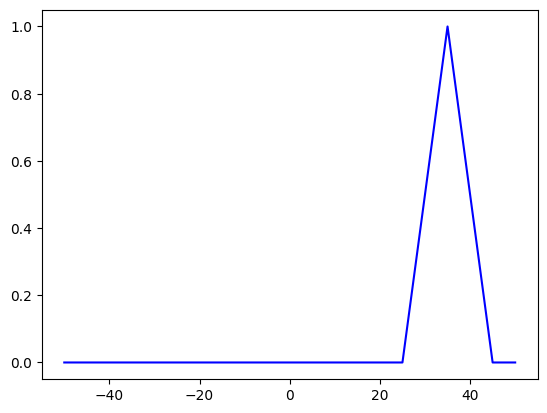

In [ ]:
print(fs.wyznacz_liste_wartosci_zbioru("Polskie lato"))
fs.zbior_rozmyty_wykres_punkty("Polskie lato")

{'Bardzo wysoka temperatura': ((25, 35, 50, 50), 0.5), 'Polskie lato': ((25, 35, 35, 45), 1), 'Wysoka temperatura': ((10, 20, 25, 35), 1)}
dict_keys(['Bardzo wysoka temperatura', 'Polskie lato', 'Wysoka temperatura'])


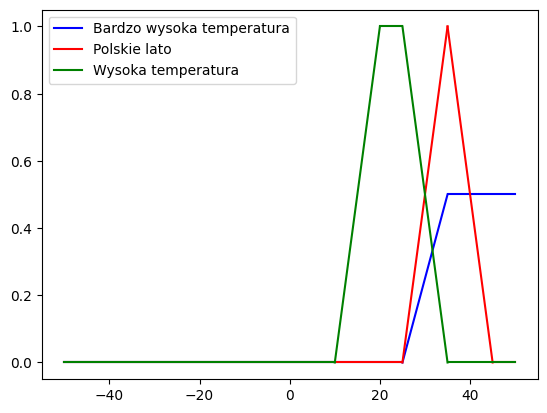

In [ ]:
fs.rysuj_wszystkie()

###  3 - Działania


Definicja 2  Niech X będzie przestrzenią $A, B \in F(X)$ oraz niech $x \in X$.

Negacją zbioru rozmytego $A$, jest zbiór rozmyty $A′$
zadany wzorem $A′(x) = 1 − A(x)$.

Sumą zbiorów $A$ i $B$ jest zbiór rozmyty $A \cup B$ zadany wzorem
$(A \cup B)(x) = \max\{A(x), B(x)\}$. (2.2)

Częścią wspólną zbiorów $A$ i $B$ jest zbiór rozmyty $A \cap B$ zadany wzorem
$(A \cap B)(x) = \min\{A(x), B(x)\}$.

W programie są tylko funkcje dla sumy i części wspólnej, ale z różnymi T- normami i S- normami.

Do klasy dodano funkcje

    dzialanie_zbiorow_rozmytych1(self, nazwa1, nazwa2, norma = dzialania_rozmyte.T_minimum, wartosc = False,  wykres=False):
        '''
        Funkcja wykonuje dane dzialanie na dwóch zbiorach rozmytych z jednej przestrzeni.
        '''

Funkcja ta generuje zbiór rozmyty zawierający listę wartości (wszystkich wartości punk po punkcie) dlatgo nazwa rozpoczyna się od P_

In [ ]:
fs.dzialanie_zbiorow_rozmytych("Bardzo wysoka temperatura", "Wysoka temperatura",dzialania_rozmyte.T_produktowa)

'P_T_produktowa(Bardzo wysoka temperatura, Wysoka temperatura)'

In [ ]:
print(fs)

Rodzina zbiorów rozmytych Temperatura,
  ('Bardzo wysoka temperatura', ((25, 35, 50, 50), 0.5))
  ('Polskie lato', ((25, 35, 35, 45), 1))
  ('Wysoka temperatura', ((10, 20, 25, 35), 1))
  ('P_T_produktowa(Bardzo wysoka temperatura, Wysoka temperatura)', ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 0.04500000000000003, 0.08000000000000006, 0.10500000000000005, 0.12000000000000004, 0.125, 0.12, 0.10499999999999997, 0.07999999999999992, 0.04499999999999986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.125))


In [ ]:
print(fs.get_zbior('Bardzo wysoka temperatura'))
print(fs.get_zbior('Wysoka temperatura'))
print(fs.get_zbior('P_T_produktowa(Bardzo wysoka temperatura, Wysoka temperatura)'))

((25, 35, 50, 50), 0.5)
((10, 20, 25, 35), 1)
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 0.04500000000000003, 0.08000000000000006, 0.10500000000000005, 0.12000000000000004, 0.125, 0.12, 0.10499999999999997, 0.07999999999999992, 0.04499999999999986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.125)


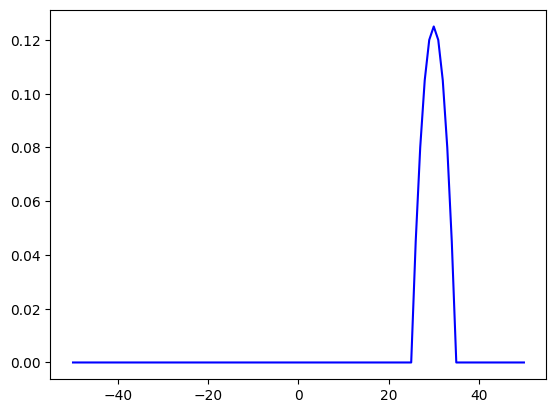

In [ ]:
fs.zbior_rozmyty_wykres_punkty('P_T_produktowa(Bardzo wysoka temperatura, Wysoka temperatura)')

{'Bardzo wysoka temperatura': ((25, 35, 50, 50), 0.5), 'Polskie lato': ((25, 35, 35, 45), 1), 'Wysoka temperatura': ((10, 20, 25, 35), 1), 'P_T_produktowa(Bardzo wysoka temperatura, Wysoka temperatura)': ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 0.04500000000000003, 0.08000000000000006, 0.10500000000000005, 0.12000000000000004, 0.125, 0.12, 0.10499999999999997, 0.07999999999999992, 0.04499999999999986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.125)}
dict_keys(['Bardzo wysoka temperatura', 'Polskie lato', 'Wysoka temperatura', 'P_T_produktowa(Bardzo wysoka temperatura, Wysoka temperatura)'])


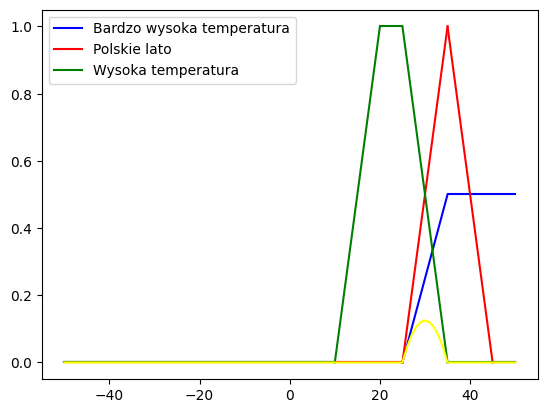

In [ ]:
fs.rysuj_wszystkie()

## Część B Sterownik

### 1 Tworzymy przestrzenie

In [2]:
przestrzenX = ZbiorRozmyty(0, 100, 0.1, 'przestrzenX')

przestrzenX.nowy_zbior_rozmyty(0, 0, 10, 34, 'DL') #daleko_lewo
przestrzenX.nowy_zbior_rozmyty(30, 40, 40, 50, 'SL') #srodek_lewo
przestrzenX.nowy_zbior_rozmyty(46, 50, 50, 54, 'SR') #srodek
przestrzenX.nowy_zbior_rozmyty(50, 60, 60, 70, 'SP') #srodek_prawo
przestrzenX.nowy_zbior_rozmyty(66, 90, 100, 100, 'DP') #daleko_prawo

{'DL': ((0, 0, 10, 34), 1), 'SL': ((30, 40, 40, 50), 1), 'SR': ((46, 50, 50, 54), 1), 'SP': ((50, 60, 60, 70), 1), 'DP': ((66, 90, 100, 100), 1)}
dict_keys(['DL', 'SL', 'SR', 'SP', 'DP'])


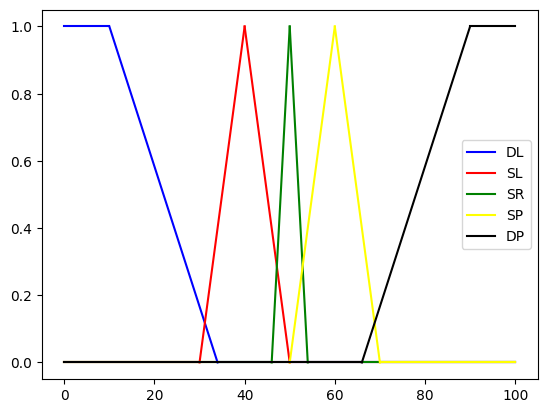

In [3]:
przestrzenX.rysuj_wszystkie()

In [4]:
przestrzenFi = ZbiorRozmyty(-90, 270, 1, 'przestrzenFi')

przestrzenFi.nowy_zbior_rozmyty(-100, -45, -45, 10, 'PPP') #prawo_pod_poziomem
przestrzenFi.nowy_zbior_rozmyty(-10, 25, 25, 60, 'PNP') #prawo_nad_poziomem
przestrzenFi.nowy_zbior_rozmyty(40, 65, 65, 90, 'PPI') #prawo_pionowo
przestrzenFi.nowy_zbior_rozmyty(80, 90, 90, 100, 'PI') #pionowo
przestrzenFi.nowy_zbior_rozmyty(90, 115, 115, 140, 'LPI') #lewo_pionowo
przestrzenFi.nowy_zbior_rozmyty(120, 155, 155, 190, 'LNP') #lewo_nad_poziomem
przestrzenFi.nowy_zbior_rozmyty(170, 225, 225, 280, 'LPP') #lewo_pod_poziomem

{'PPP': ((-100, -45, -45, 10), 1), 'PNP': ((-10, 25, 25, 60), 1), 'PPI': ((40, 65, 65, 90), 1), 'PI': ((80, 90, 90, 100), 1), 'LPI': ((90, 115, 115, 140), 1), 'LNP': ((120, 155, 155, 190), 1), 'LPP': ((170, 225, 225, 280), 1)}
dict_keys(['PPP', 'PNP', 'PPI', 'PI', 'LPI', 'LNP', 'LPP'])


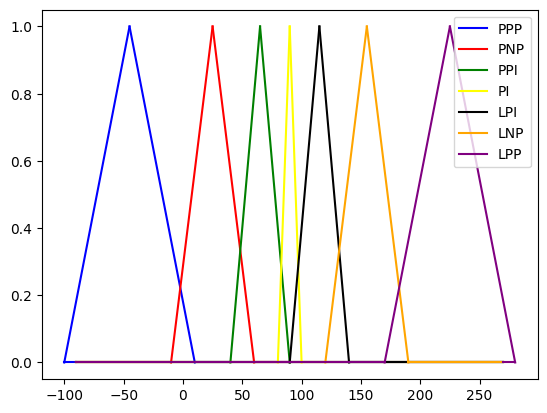

In [5]:
przestrzenFi.rysuj_wszystkie()

In [6]:
przestrzenTheta = ZbiorRozmyty(-30, 30, 1, 'przestrzenTheta')

przestrzenTheta.nowy_zbior_rozmyty(-30, -30, -30, -15, 'PD') #przeciwnie_daleko
przestrzenTheta.nowy_zbior_rozmyty(-25, -15, -15, -5, 'PSR') #przeciwnie_srednio
przestrzenTheta.nowy_zbior_rozmyty(-10, -5, -5, 0, 'PSL') #przeciwnie_slabo
przestrzenTheta.nowy_zbior_rozmyty(-5, 0, 0, 5, 'N') #neutralnie
przestrzenTheta.nowy_zbior_rozmyty(0, 5, 5, 10, 'ZSL') #zgodnie_slabo
przestrzenTheta.nowy_zbior_rozmyty(5, 15, 15, 25, 'ZSR') #zgodnie_srednio
przestrzenTheta.nowy_zbior_rozmyty(15, 30, 30, 30, 'ZD') #zgodnie_daleko

{'PD': ((-30, -30, -30, -15), 1), 'PSR': ((-25, -15, -15, -5), 1), 'PSL': ((-10, -5, -5, 0), 1), 'N': ((-5, 0, 0, 5), 1), 'ZSL': ((0, 5, 5, 10), 1), 'ZSR': ((5, 15, 15, 25), 1), 'ZD': ((15, 30, 30, 30), 1)}
dict_keys(['PD', 'PSR', 'PSL', 'N', 'ZSL', 'ZSR', 'ZD'])


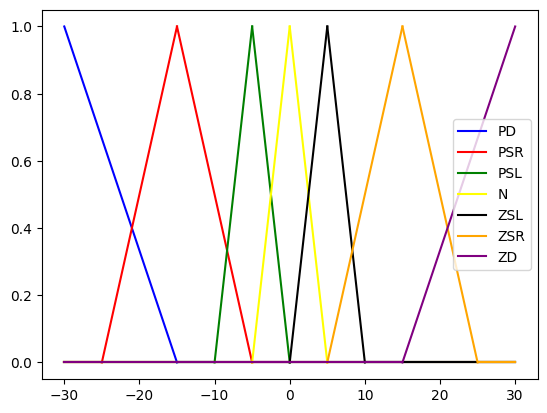

In [7]:

przestrzenTheta.rysuj_wszystkie()

In [8]:
print(przestrzenTheta)

Rodzina zbiorów rozmytych przestrzenTheta,
  ('PD', ((-30, -30, -30, -15), 1))
  ('PSR', ((-25, -15, -15, -5), 1))
  ('PSL', ((-10, -5, -5, 0), 1))
  ('N', ((-5, 0, 0, 5), 1))
  ('ZSL', ((0, 5, 5, 10), 1))
  ('ZSR', ((5, 15, 15, 25), 1))
  ('ZD', ((15, 30, 30, 30), 1))


In [9]:
zbioryX = list(przestrzenX.get_zbiory().keys())
print(zbioryX)


['DL', 'SL', 'SR', 'SP', 'DP']


In [10]:
zbioryFi = list(przestrzenFi.get_zbiory().keys())
print(zbioryFi)

['PPP', 'PNP', 'PPI', 'PI', 'LPI', 'LNP', 'LPP']


### 2 - Blok rozmywania

In [11]:
pomiar_x = 21.41#20
przestrzenX.nowy_zbior_rozmyty(pomiar_x-1, pomiar_x, pomiar_x, pomiar_x+1, 'pomiar_x')


In [12]:
pomiar_fi = 34.54#45
przestrzenFi.nowy_zbior_rozmyty(pomiar_fi-1, pomiar_fi, pomiar_fi, pomiar_fi+1, 'pomiar_fi')

{'DL': ((0, 0, 10, 34), 1), 'SL': ((30, 40, 40, 50), 1), 'SR': ((46, 50, 50, 54), 1), 'SP': ((50, 60, 60, 70), 1), 'DP': ((66, 90, 100, 100), 1), 'pomiar_x': ((20.41, 21.41, 21.41, 22.41), 1)}
dict_keys(['DL', 'SL', 'SR', 'SP', 'DP', 'pomiar_x'])


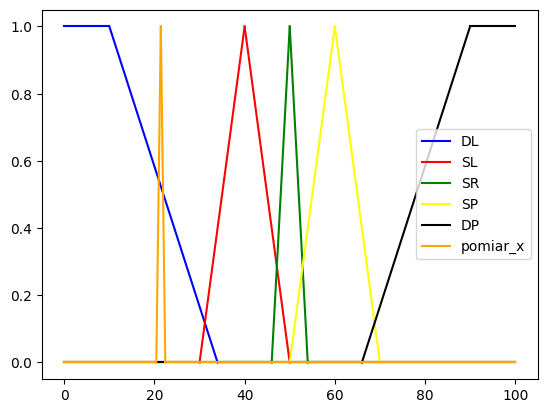

In [13]:
przestrzenX.rysuj_wszystkie()

In [14]:
print(przestrzenX)

Rodzina zbiorów rozmytych przestrzenX,
  ('DL', ((0, 0, 10, 34), 1))
  ('SL', ((30, 40, 40, 50), 1))
  ('SR', ((46, 50, 50, 54), 1))
  ('SP', ((50, 60, 60, 70), 1))
  ('DP', ((66, 90, 100, 100), 1))
  ('pomiar_x', ((20.41, 21.41, 21.41, 22.41), 1))


{'PPP': ((-100, -45, -45, 10), 1), 'PNP': ((-10, 25, 25, 60), 1), 'PPI': ((40, 65, 65, 90), 1), 'PI': ((80, 90, 90, 100), 1), 'LPI': ((90, 115, 115, 140), 1), 'LNP': ((120, 155, 155, 190), 1), 'LPP': ((170, 225, 225, 280), 1), 'pomiar_fi': ((33.54, 34.54, 34.54, 35.54), 1)}
dict_keys(['PPP', 'PNP', 'PPI', 'PI', 'LPI', 'LNP', 'LPP', 'pomiar_fi'])


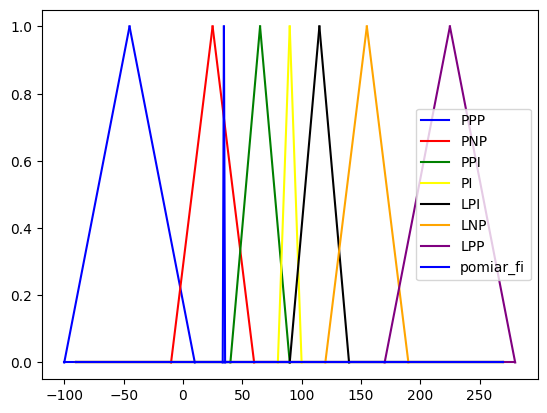

In [15]:
przestrzenFi.rysuj_wszystkie()

In [16]:
print(przestrzenFi)

Rodzina zbiorów rozmytych przestrzenFi,
  ('PPP', ((-100, -45, -45, 10), 1))
  ('PNP', ((-10, 25, 25, 60), 1))
  ('PPI', ((40, 65, 65, 90), 1))
  ('PI', ((80, 90, 90, 100), 1))
  ('LPI', ((90, 115, 115, 140), 1))
  ('LNP', ((120, 155, 155, 190), 1))
  ('LPP', ((170, 225, 225, 280), 1))
  ('pomiar_fi', ((33.54, 34.54, 34.54, 35.54), 1))


### 3 - Wybieramy  odpalone reguły

In [ ]:
print(zbioryX)

['DL', 'SL', 'SR', 'SP', 'DP']


In [ ]:
odpalone_x = przestrzenX.sprawdz_pomiar_ze_zbiorami('pomiar_x', zbioryX)
print(f"Odpalone reguły przestrzeni X to {odpalone_x}")

Odpalone reguły przestrzeni X to {'DL': 0.54}


Wykresy tylko opdalonych reguł i zbioru rozmytego pomiar.

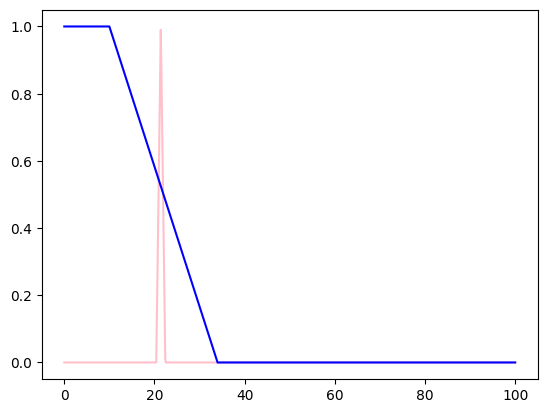

In [ ]:
przestrzenX.zbior_rozmyty_wykres_punkty("pomiar_x", kolor = "pink")
for i in odpalone_x.keys():
  przestrzenX.zbior_rozmyty_wykres_punkty(i, kolor = "blue")

Przestrzeń FI - odpalanie reguł

In [ ]:
odpalone_Fi = przestrzenFi.sprawdz_pomiar_ze_zbiorami('pomiar_fi', zbioryFi)
print(f"Odpalone reguły z przestrzeni Fi to {odpalone_Fi}")

Odpalone reguły z przestrzeni Fi to {'PNP': 0.54}


Wykresy tylko odpalonych zbiorów z przestrzeni FI i pomiar Fi

((33.54, 34.54, 34.54, 35.54), 1)


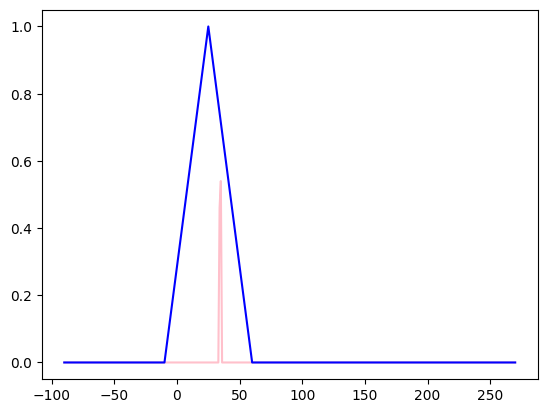

In [ ]:
przestrzenFi.zbior_rozmyty_wykres_punkty('pomiar_fi', kolor = "pink")
print(przestrzenFi.get_zbior('pomiar_fi'))
for i in odpalone_Fi.keys():
  przestrzenFi.zbior_rozmyty_wykres_punkty(i, kolor = "blue")

### 4 Baza reguł

In [ ]:
reguly = {
    'DL' : {
        'PPP': 'ZSL', 'PNP' : 'PSL', 'PPI' : 'PSR', 'PI' : 'PSR', 'LPI' : 'PD', 'LNP' : 'PD', 'LPP' : 'PD'
        },
    'SL' : {
        'PPP' : 'ZSR', 'PNP' : 'ZSL', 'PPI' : 'PSL', 'PI' : 'PSR', 'LPI' : 'PSR', 'LNP' : 'PD', 'LPP' : 'PD'
        },
    'SR' : {
        'PPP' : 'ZSR', 'PNP' : 'ZSR', 'PPI' : 'ZSL', 'PI' : 'N', 'LPI' : 'PSL', 'LNP' : 'PSR', 'LPP' : 'PSR'
        },
    'SP' : {
        'PPP' : 'ZD', 'PNP' : 'ZD', 'PPI' : 'ZSR', 'PI' : 'ZSR', 'LPI' : 'ZSL', 'LNP' : 'PSL', 'LPP' : 'PSR'
        },
    'DP' : {
        'PPP' : 'ZD', 'PNP' : 'ZD', 'PPI' : 'ZD', 'PI' : 'ZSR', 'LPI' : 'ZSR', 'LNP' : 'ZSL', 'LPP' : 'PSL'
        }
    }

Wybieramy reguły aktywne

In [ ]:
print(odpalone_x)
print(odpalone_Fi)

{'DL': 0.54}
{'PNP': 0.54}


In [ ]:
print("Wyjęte z bazy reguł")
odpalone_Theta =[]
for k,v  in odpalone_x.items():
  print(f"Odpalone z przestrzeni X {k,v}")
  for k1,v1 in odpalone_Fi.items():
    print(f"Odpalone z przestrzeni FI {k1,v1}")
    wynik = reguly[k][k1] ###z bazy reguł wybieramy tę która się odpali
    print(v,v1)
    wynik_wartosc = min(v,v1) ###agregujemy reguły aktywne
    print(f"\tOdpalone z przestzreni FI {k1, v1} ->>> {wynik, wynik_wartosc}")
    odpalone_Theta.append((wynik, wynik_wartosc))


Wyjęte z bazy reguł
Odpalone z przestrzeni X ('DL', 0.54)
Odpalone z przestrzeni FI ('PNP', 0.54)
0.54 0.54
	Odpalone z przestzreni FI ('PNP', 0.54) ->>> ('PSL', 0.54)


Rysujemy reguły odpalone z przestrzeni Theta

In [ ]:
print(odpalone_Theta)

[('PSL', 0.54)]


Wykres odpalonych reguł

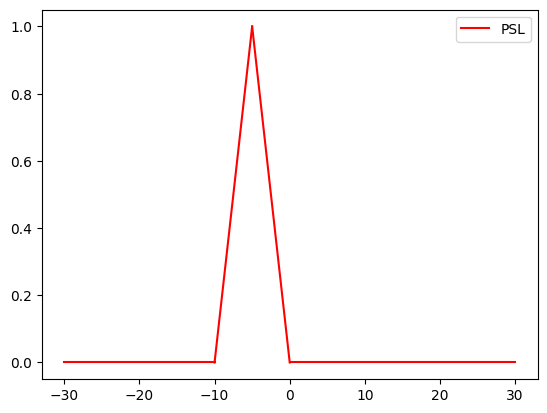

In [ ]:
i = 0
for zb in  odpalone_Theta:
  kolor = ["red" , "blue", "orange", "yellow"]
  przestrzenTheta.zbior_rozmyty_wykres(zb[0], kolor = kolor[i%len(kolor)])

  i = i+1

### 5 Odcinamy reguły aktywne z przestrzeni Theta na poziomie odpalenia.

Tworzymy zbiór wyników, nie dodajemy tych zbiorów do przestrzeni Theta, bo za chilę je usuniemy

In [ ]:
print(przestrzenTheta)

Rodzina zbiorów rozmytych przestrzenTheta,
  ('PD', ((-30, -30, -30, -15), 1))
  ('PSR', ((-25, -15, -15, -5), 1))
  ('PSL', ((-10, -5, -5, 0), 1))
  ('N', ((-5, 0, 0, 5), 1))
  ('ZSL', ((0, 5, 5, 10), 1))
  ('ZSR', ((5, 15, 15, 25), 1))
  ('ZD', ((15, 30, 30, 30), 1))


In [ ]:
przestrzenWyniki = ZbiorRozmyty(-30, 30, 1, 'przestrzenWyniki')

for el in odpalone_Theta:
  nazwa_zbioru = el[0]
  wartosci = przestrzenTheta.get_zbiory()[nazwa_zbioru]
  stopien_odpalenia = el[1]
  ###Tu punkt po punkcie wyznaczamy wartość funkcji przynależności z odpalonego zbioru z przestrzeni Theta
  #### zamiast minimum można brać imlikacje, ale nie zawsze otrzymamy dobry wynik
  wyniki =  przestrzenTheta.implikacja(nazwa_zbioru, stopien_odpalenia,dzialania_rozmyte.T_minimum)
  przestrzenWyniki.nowy_zbior_rozmyty_punkty(wyniki[0], wyniki[1])
  print(f"\nwyniki odcinania = {wyniki}\n")
print(przestrzenWyniki)



wyniki odcinania = ('P_PSL_Implikacja', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19999999999999996, 0.3999999999999999, 0.54, 0.54, 0.54, 0.54, 0.54, 0.4, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Rodzina zbiorów rozmytych przestrzenWyniki,
  ('P_PSL_Implikacja', ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19999999999999996, 0.3999999999999999, 0.54, 0.54, 0.54, 0.54, 0.54, 0.4, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.54))


Rysujemy zbiory z przestrzeni wyniki.

{'P_PSL_Implikacja': ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19999999999999996, 0.3999999999999999, 0.54, 0.54, 0.54, 0.54, 0.54, 0.4, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.54)}
dict_keys(['P_PSL_Implikacja'])


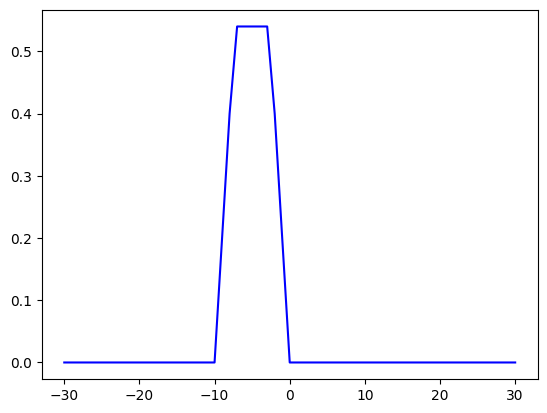

In [ ]:
przestrzenWyniki.rysuj_wszystkie()

### 6 Wyznaczmy sumę zbiorów z przestrzeni wyniki i dokonujemy defuzyfikacji, czyli wyznaczenia konkretnej wartości

Korzystamy z listy *lista_zbiorow_wyniki*. Suma tzn. maksimum. Wykorzystujemy funkcję     

    dzialanie_zbiorow_rozmytych(self, nazwa1, nazwa2, norma = dzialania_rozmyte.T_minimum, wartosc = False,  wykres=False)

Idea działania bierzemy pierwsze dwa dwia elementy  z listy, wyznaczamy wynik działania, który zapisujemy do zmiennej *wynik*.
Dalej bierzemy *wynik* i *trzeci element* z listy rezultat zapisujemy do zmiennej *wynik* itd. Na końcu w zmiennej wynik mamy sumę.


In [ ]:
print(przestrzenWyniki.get_zbiory())
lista_zbiorow_do_sumy = []
for klucz in  przestrzenWyniki.get_zbiory().keys():
  lista_zbiorow_do_sumy.append(klucz)
print(lista_zbiorow_do_sumy)

{'P_PSL_Implikacja': ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19999999999999996, 0.3999999999999999, 0.54, 0.54, 0.54, 0.54, 0.54, 0.4, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.54)}
['P_PSL_Implikacja']


In [ ]:
zbior1 = lista_zbiorow_do_sumy[0]
ile_do_sumy = len(lista_zbiorow_do_sumy)
if ile_do_sumy == 1:
  theta = przestrzenWyniki.wyostrzenie(zbior1)
else:
  for i in range(1, len(lista_zbiorow_do_sumy)):
    print(i)
    zbior2 = lista_zbiorow_do_sumy[i]
    print(zbior1, zbior2)
    suma = przestrzenWyniki.dzialanie_zbiorow_rozmytych(zbior1, zbior2, dzialania_rozmyte.S_maksimum, False)
    print(f'Wynik suma zbiorów = {suma}')
    theta = przestrzenWyniki.wyostrzenie(suma_)
print(theta)

-5.0


{'P_PSL_Implikacja': ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19999999999999996, 0.3999999999999999, 0.54, 0.54, 0.54, 0.54, 0.54, 0.4, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.54)}
dict_keys(['P_PSL_Implikacja'])


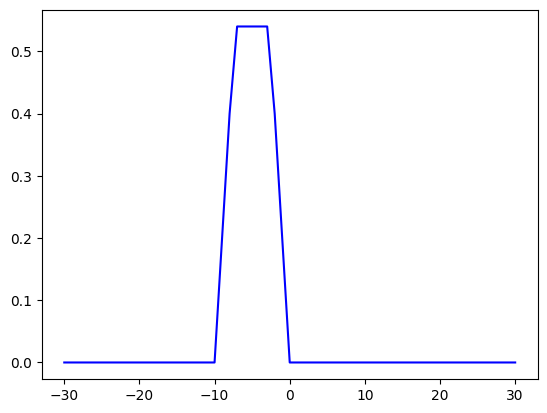

In [ ]:
przestrzenWyniki.rysuj_wszystkie()

## Część C - łączymy wszystko i rysujemy wykres

In [17]:
import math
import matplotlib.pyplot as plt
przestrzenX = ZbiorRozmyty(0, 100, 0.1, 'przestrzenX')

przestrzenX.nowy_zbior_rozmyty(0, 0, 10, 34, 'DL') #daleko_lewo
przestrzenX.nowy_zbior_rozmyty(30, 40, 40, 50, 'SL') #srodek_lewo
przestrzenX.nowy_zbior_rozmyty(46, 50, 50, 54, 'SR') #srodek
przestrzenX.nowy_zbior_rozmyty(50, 60, 60, 70, 'SP') #srodek_prawo
przestrzenX.nowy_zbior_rozmyty(66, 90, 100, 100, 'DP') #daleko_prawo

przestrzenFi = ZbiorRozmyty(-90, 270, 1, 'przestrzenFi')

przestrzenFi.nowy_zbior_rozmyty(-100, -45, -45, 10, 'PPP') #prawo_pod_poziomem
przestrzenFi.nowy_zbior_rozmyty(-10, 25, 25, 60, 'PNP') #prawo_nad_poziomem
przestrzenFi.nowy_zbior_rozmyty(40, 65, 65, 90, 'PPI') #prawo_pionowo
przestrzenFi.nowy_zbior_rozmyty(80, 90, 90, 100, 'PI') #pionowo
przestrzenFi.nowy_zbior_rozmyty(90, 115, 115, 140, 'LPI') #lewo_pionowo
przestrzenFi.nowy_zbior_rozmyty(120, 155, 155, 190, 'LNP') #lewo_nad_poziomem
przestrzenFi.nowy_zbior_rozmyty(170, 225, 225, 280, 'LPP') #lewo_pod_poziomem

przestrzenTheta = ZbiorRozmyty(-30, 30, 1, 'przestrzenTheta')

przestrzenTheta.nowy_zbior_rozmyty(-30, -30, -30, -15, 'PD') #przeciwnie_daleko
przestrzenTheta.nowy_zbior_rozmyty(-25, -15, -15, -5, 'PSR') #przeciwnie_srednio
przestrzenTheta.nowy_zbior_rozmyty(-10, -5, -5, 0, 'PSL') #przeciwnie_slabo
przestrzenTheta.nowy_zbior_rozmyty(-5, 0, 0, 5, 'N') #neutralnie
przestrzenTheta.nowy_zbior_rozmyty(0, 5, 5, 10, 'ZSL') #zgodnie_slabo
przestrzenTheta.nowy_zbior_rozmyty(5, 15, 15, 25, 'ZSR') #zgodnie_srednio
przestrzenTheta.nowy_zbior_rozmyty(15, 30, 30, 30, 'ZD') #zgodnie_daleko

zbioryX = list(przestrzenX.get_zbiory().keys())
zbioryFi = list(przestrzenFi.get_zbiory().keys())


In [18]:
###Baza reguł
reguly = {
    'DL' : {
        'PPP': 'ZSL', 'PNP' : 'PSL', 'PPI' : 'PSR', 'PI' : 'PSR', 'LPI' : 'PD', 'LNP' : 'PD', 'LPP' : 'PD'
        },
    'SL' : {
        'PPP' : 'ZSR', 'PNP' : 'ZSL', 'PPI' : 'PSL', 'PI' : 'PSR', 'LPI' : 'PSR', 'LNP' : 'PD', 'LPP' : 'PD'
        },
    'SR' : {
        'PPP' : 'ZSR', 'PNP' : 'ZSR', 'PPI' : 'ZSL', 'PI' : 'N', 'LPI' : 'PSL', 'LNP' : 'PSR', 'LPP' : 'PSR'
        },
    'SP' :  {
        'PPP' : 'ZD', 'PNP' : 'ZD', 'PPI' : 'ZSR', 'PI' : 'ZSR', 'LPI' : 'ZSL', 'LNP' : 'PSL', 'LPP' : 'PSR'
        },
    'DP' : {
        'PPP' : 'ZD', 'PNP' : 'ZD', 'PPI' : 'ZD', 'PI' : 'ZSR', 'LPI' : 'ZSR', 'LNP' : 'ZSL', 'LPP' : 'PSL'
        }
    }
#Blok rozmywania



Theta =-14.999999999999995 y= 30
NOwe x= 20.0, y=32.0, fi = 75.0


Theta =-14.999999999999995 y= 32.0
NOwe x= 20.51763809020504, y=33.93185165257814, fi = 60.00000000000001


Theta =-15.0 y= 33.93185165257814
NOwe x= 21.51763809020504, y=35.663902460147014, fi = 45.00000000000001


Theta =-9.911392405063289 y= 35.663902460147014
NOwe x= 22.931851652578136, y=37.078116022520106, fi = 35.08860759493672


Theta =-4.999999999999998 y= 37.078116022520106
NOwe x= 24.56837971739421, y=38.227801150313525, fi = 30.088607594936718


Theta =-4.999999999999999 y= 38.227801150313525
NOwe x= 26.298881960081097, y=39.230478560079824, fi = 25.088607594936718


Theta =-5.0 y= 39.230478560079824
NOwe x= 28.110188213666127, y=40.078517271297514, fi = 20.088607594936718


Theta =-4.999999999999999 y= 40.078517271297514
NOwe x= 29.988513343862902, y=40.765463197314446, fi = 15.088607594936718


Theta =-1.8965517241379308 y= 40.765463197314446
NOwe x= 31.919562162266903, y=41.28608826484435, fi = 13.1920558

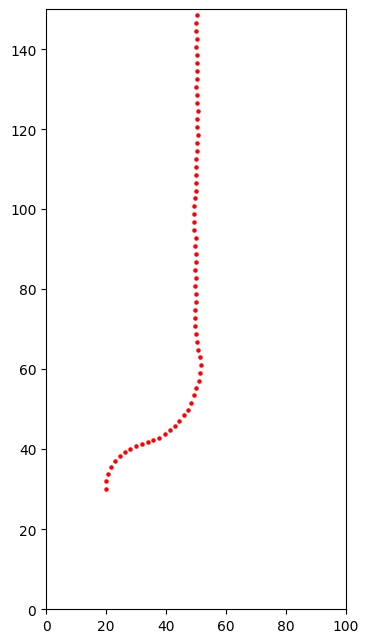

In [23]:
y = 30
theta = 0
d = 2
pomiar_x = 20
pomiar_fi = 90

f = plt.figure(figsize=(3,6))
f.add_axes([0.,0.,1.,1.], facecolor='white')
plt.xlim(0,100)
plt.ylim(0,150)
while y < 150:
    przestrzenX.nowy_zbior_rozmyty(pomiar_x-1, pomiar_x, pomiar_x, pomiar_x+1, 'pomiar_x')
    przestrzenFi.nowy_zbior_rozmyty(pomiar_fi-1, pomiar_fi, pomiar_fi, pomiar_fi+1, 'pomiar_fi')
    ###Wybieramy odalone reguły
    odpalone_x = przestrzenX.sprawdz_pomiar_ze_zbiorami('pomiar_x', zbioryX)
    # print(f"Odpalone reguły przestrzeni X to {odpalone_x}")
    odpalone_Fi = przestrzenFi.sprawdz_pomiar_ze_zbiorami('pomiar_fi', zbioryFi)
    # print(f"Odpalone reguły z przestrzeni Fi to {odpalone_Fi}")
    #print("Wybieramy reguły aktywne")
    odpalone_Theta =[]
    for k,v  in odpalone_x.items():
      #print(f"Odpalone z przestrzeni X {k,v}")
      for k1,v1 in odpalone_Fi.items():
        #print(f"Odpalone z przestrzeni FI {k1,v1}")
        wynik = reguly[k][k1]
        wynik_wartosc = min(v,v1)

        odpalone_Theta.append((wynik, wynik_wartosc))
        #print(f"Odpalone Theta {odpalone_Theta}")

    przestrzenWyniki = ZbiorRozmyty(-30, 30, 1, 'przestrzenWyniki')

    for el in odpalone_Theta:
      nazwa_zbioru = el[0]
      wartosci = przestrzenTheta.get_zbiory()[nazwa_zbioru]
      stopien_odpalenia = el[1]
      #print(f"nazwa = {nazwa_zbioru}, wartosci = {wartosci}, stopien_odpalenia = {stopien_odpalenia}")
      # print(f"\tOdpalone z przestzreni FI {k1, v1} ->>> {wynik, wynik_wartosc}")
      #### naz zbiorze odpalonym z przestrzeni Theta wykonaj działanie implikacji
      ####pierwszym argumentem są punkty tego zbioru, czyli zbiór a drugim stopień odpalenia
      wyniki =  przestrzenTheta.implikacja(nazwa_zbioru, stopien_odpalenia,dzialania_rozmyte.T_produktowa)
      # print(f"\nwyniki działania implikacji = {wyniki}\n")
      przestrzenWyniki.nowy_zbior_rozmyty_punkty(wyniki[0], wyniki[1])

    lista_zbiorow_do_sumy = []
    for klucz in  przestrzenWyniki.get_zbiory().keys():
      lista_zbiorow_do_sumy.append(klucz)
   # print(f"Lista _zb do sumy {lista_zbiorow_do_sumy}")
    zbior1 = lista_zbiorow_do_sumy[0]
    ile_do_sumy = len(lista_zbiorow_do_sumy)
    if ile_do_sumy == 1:
      theta = przestrzenWyniki.wyostrzenie(zbior1)
    else:
      for i in range(1, len(lista_zbiorow_do_sumy)):
          #print(i)
          zbior2 = lista_zbiorow_do_sumy[i]
          #print(zbior1, zbior2)
          suma_ = przestrzenWyniki.dzialanie_zbiorow_rozmytych(zbior1, zbior2, dzialania_rozmyte.S_maksimum, False)
          #print(f'Wynik suma zbiorów _= {suma_}')
          #####Wyostrzenie
          theta = przestrzenWyniki.wyostrzenie(suma_)
    print(f"Theta ={theta} y= {y}")
    #print(przestrzenX)
    #print(przestrzenFi)
    #print(przestrzenTheta)
    #print(przestrzenWyniki)


    fi_rad = math.radians(pomiar_fi)
    x_nowy = pomiar_x + d*math.cos(fi_rad)
    y_nowy = y + d*math.sin(fi_rad)
    fi_nowe = (pomiar_fi+theta)

    plt.scatter(pomiar_x, y, s=5, color='red')
    pomiar_x = x_nowy
    y = y_nowy
    pomiar_fi = fi_nowe
    print(f"NOwe x= {pomiar_x}, y={y}, fi = {pomiar_fi}\n\n")


plt.show()